In [1]:
!jupyter --version

Selected Jupyter core packages...
IPython          : 7.31.1
ipykernel        : 6.15.2
ipywidgets       : 7.6.5
jupyter_client   : 7.4.8
jupyter_core     : 4.11.1
jupyter_server   : 1.23.4
jupyterlab       : 3.5.2
nbclient         : 0.5.13
nbconvert        : 6.5.3
nbformat         : 5.7.0
notebook         : 6.5.2
qtconsole        : 5.4.0
traitlets        : 5.7.1


In [2]:
pwd

'D:\\Documents\\CU Boulder\\5506 Data Mining Project'

In [3]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import requests
import json, os, datetime
import csv
import datetime
import calendar
import xgboost
import shap
from pandas import DataFrame
from pprint import pprint
import seaborn as sns
from colorama import Fore, Back, Style
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.inspection import permutation_importance
from xgboost import XGBClassifier

%matplotlib inline
import os
import copy
import dabl
from imblearn.combine import SMOTEENN
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score, classification_report
from sklearn.model_selection import train_test_split
from genetic_selection import GeneticSelectionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [4]:
nasa = pd.read_csv("nasa.csv")
nasa.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219878,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2458161.642,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2457794.969,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2458120.468,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2457902.337,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219878,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2457814.455,135.142133,0.726395,J2000,True


**We FIRST check to see if there are any missing values and the data types for each feature, this can be completed in below step:**

In [5]:
for col in nasa.columns:
    print("Colum Length: " + " " + col + "=", len(nasa[col]))

Colum Length:  Neo Reference ID= 4687
Colum Length:  Name= 4687
Colum Length:  Absolute Magnitude= 4687
Colum Length:  Est Dia in KM(min)= 4687
Colum Length:  Est Dia in KM(max)= 4687
Colum Length:  Est Dia in M(min)= 4687
Colum Length:  Est Dia in M(max)= 4687
Colum Length:  Est Dia in Miles(min)= 4687
Colum Length:  Est Dia in Miles(max)= 4687
Colum Length:  Est Dia in Feet(min)= 4687
Colum Length:  Est Dia in Feet(max)= 4687
Colum Length:  Close Approach Date= 4687
Colum Length:  Epoch Date Close Approach= 4687
Colum Length:  Relative Velocity km per sec= 4687
Colum Length:  Relative Velocity km per hr= 4687
Colum Length:  Miles per hour= 4687
Colum Length:  Miss Dist.(Astronomical)= 4687
Colum Length:  Miss Dist.(lunar)= 4687
Colum Length:  Miss Dist.(kilometers)= 4687
Colum Length:  Miss Dist.(miles)= 4687
Colum Length:  Orbiting Body= 4687
Colum Length:  Orbit ID= 4687
Colum Length:  Orbit Determination Date= 4687
Colum Length:  Orbit Uncertainity= 4687
Colum Length:  Minimum Orb

In [6]:
nasa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

False    3932
True      755
Name: Hazardous, dtype: int64




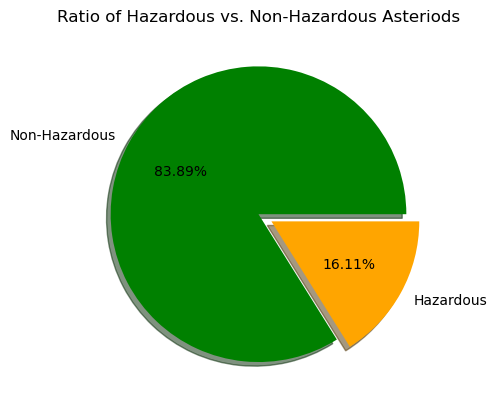

In [7]:
# Check the ratio of Hazardous vs. Non-Hazerdous Asteroids
print(nasa['Hazardous'].value_counts())
print('\n')
lab = 'Non-Hazardous', 'Hazardous'
explode =(0,0.1)
plt.pie(nasa['Hazardous'].value_counts(), explode = explode, labels = lab, colors=['green', 'orange'], autopct='%1.2f%%', shadow=True,
       counterclock=True)
plt.title('Ratio of Hazardous vs. Non-Hazardous Asteriods')
plt.show()

#Reference:
#1.https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html
#2.https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py

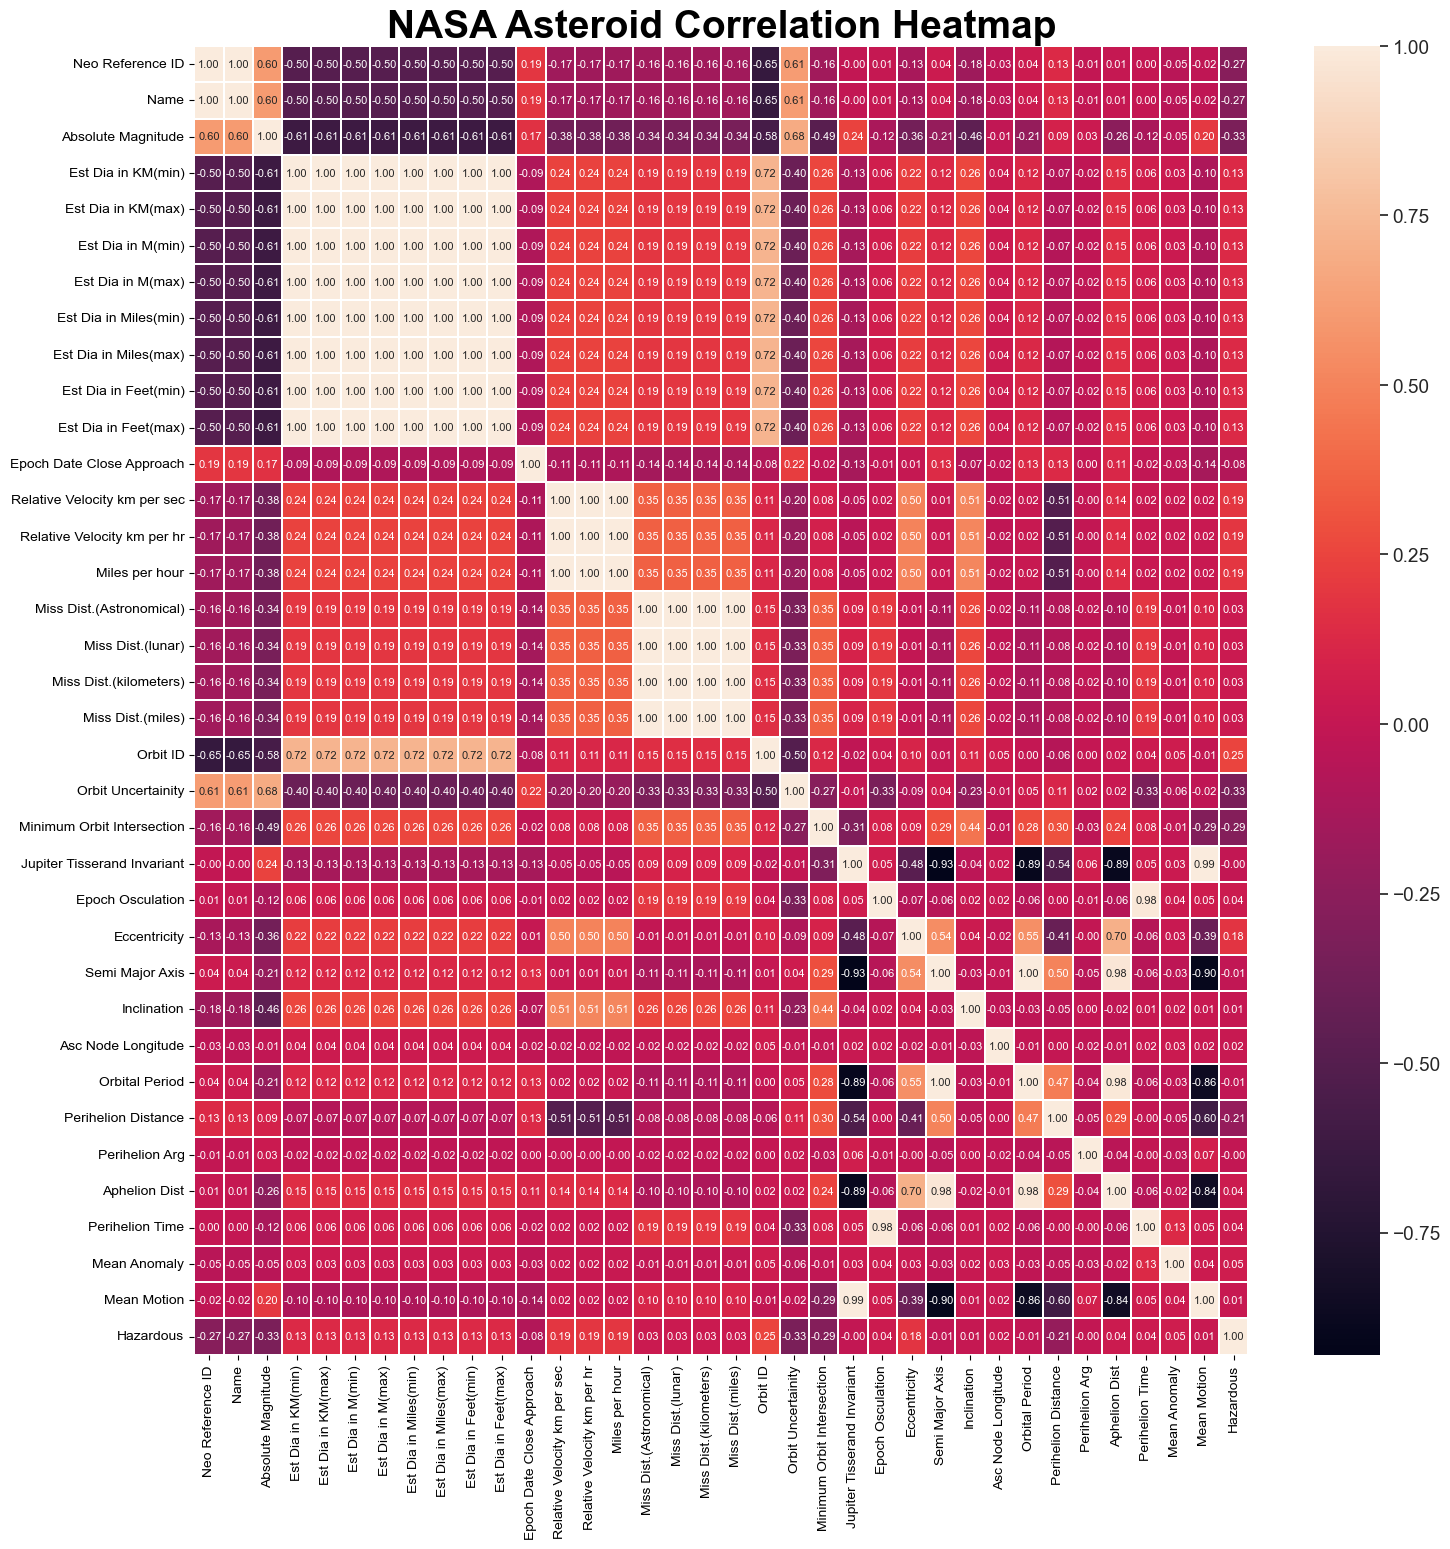

In [8]:
cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)
nasa_corr = nasa[['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox', 'Hazardous']].corr()


fig, ax = plt.subplots(figsize=(17,17))
ax.set_ylim([0,40])

for text in ax.texts:
    text.set_weight('bold')

sns.set(font_scale= 1.25)
sns.heatmap(nasa_corr, xticklabels=1, yticklabels=1, annot=True, annot_kws={"fontsize":8}, linewidths = .2, ax=ax, fmt=".2f")

plt.title("NASA Asteroid Correlation Heatmap", fontsize= 28, weight="bold")   

plt.savefig('nasa_heatmap.png')

plt.show()


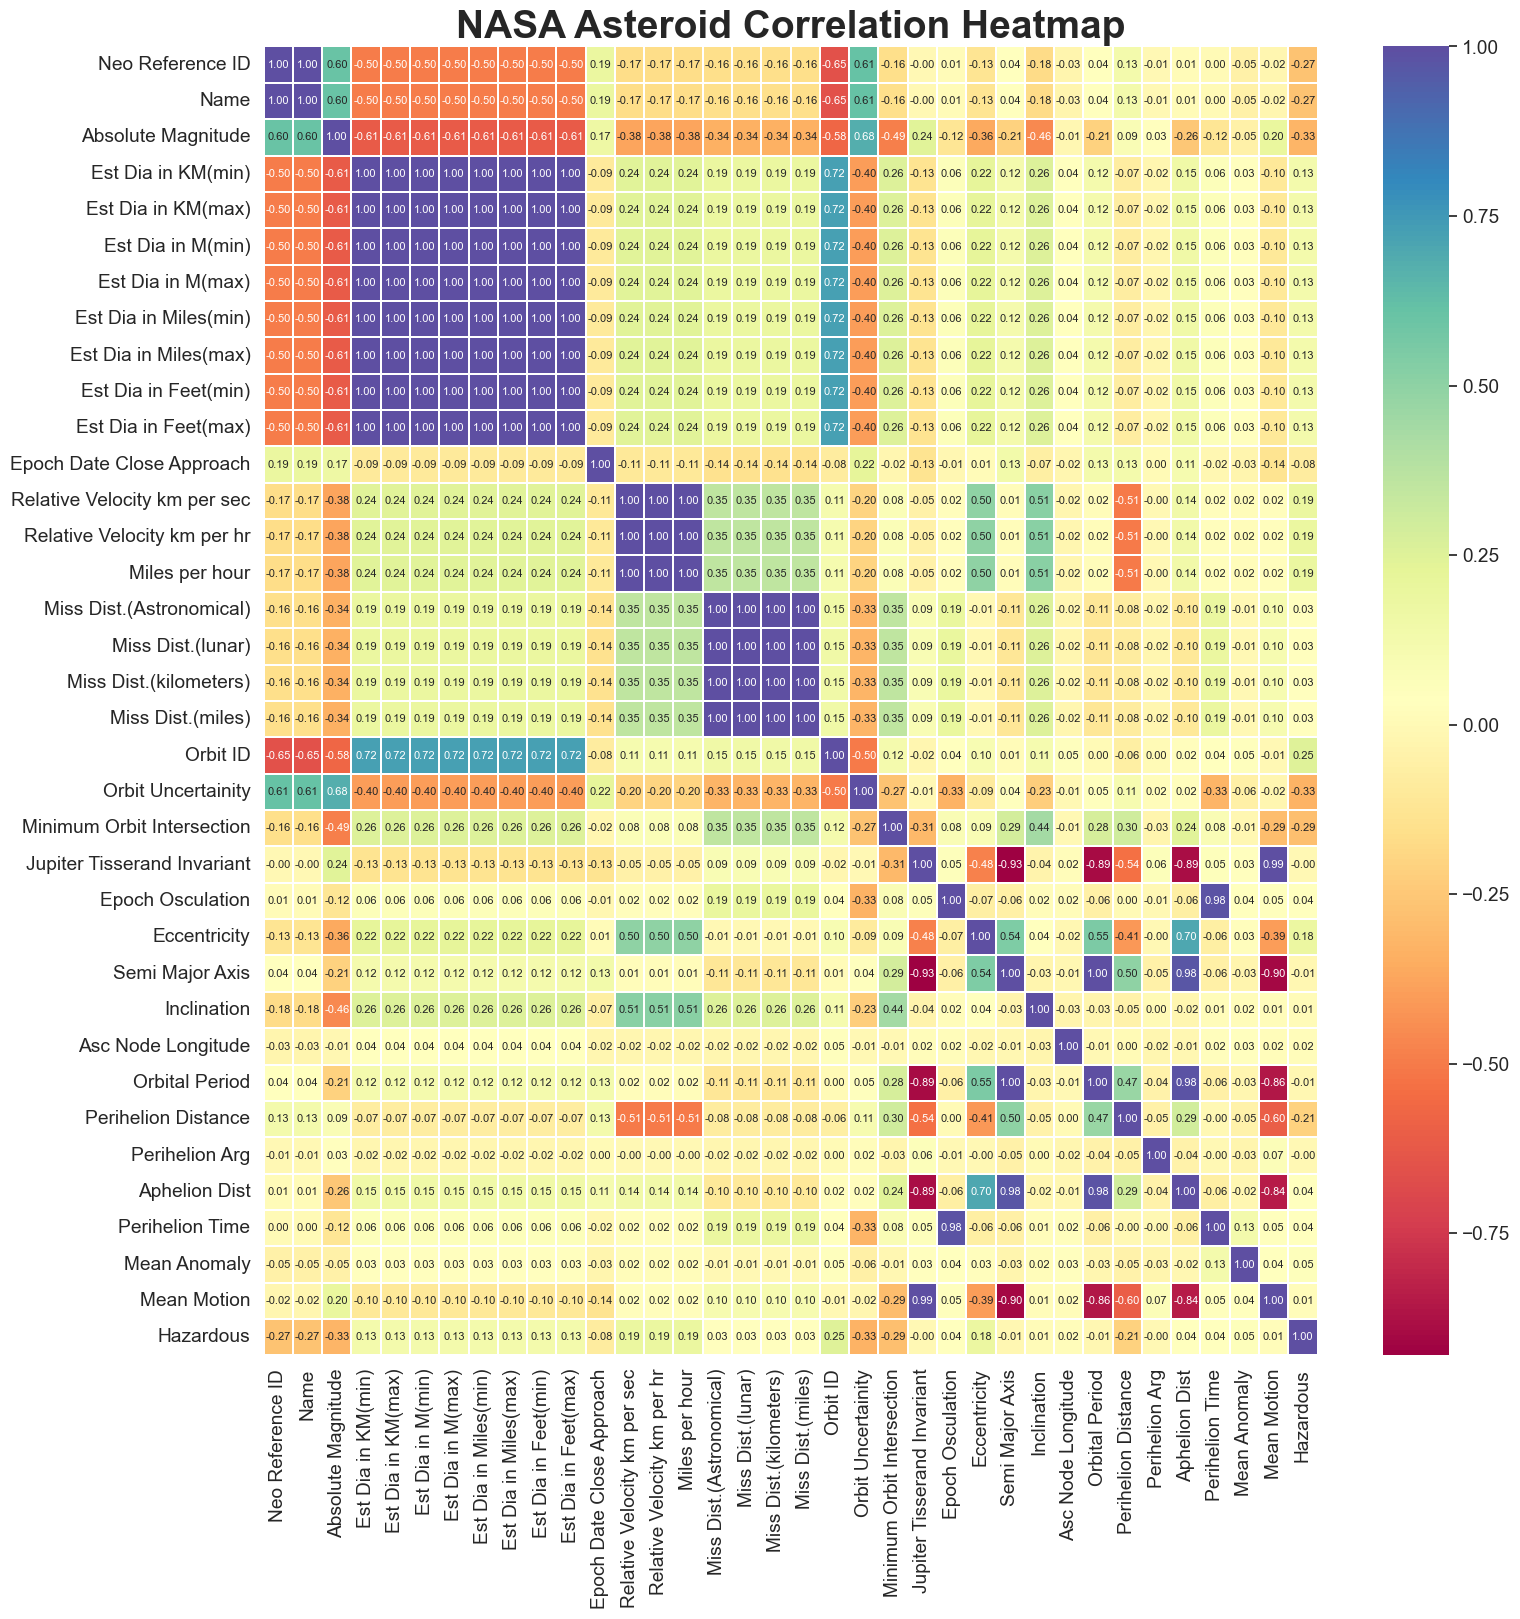

In [9]:
fig, ax = plt.subplots(figsize=(17,17))
ax.set_ylim([0,40])

for text in ax.texts:
    text.set_weight('bold')

sns.set(font_scale= 1.25)
sns.heatmap(nasa_corr, cmap ='Spectral', xticklabels=1, yticklabels=1, annot=True, annot_kws={"fontsize":8}, linewidths = .2, ax=ax, fmt=".2f")

plt.title("NASA Asteroid Correlation Heatmap", fontsize= 28, weight="bold")   

plt.savefig('nasa_heatmap_spectral.jpg')

plt.show()


**Also, the "lower-left triangle" and the "upper-right triangle" are mirror images of each other, so it is visually clearer to remove the upper-right one. This can be simply accomplished using "mask".**

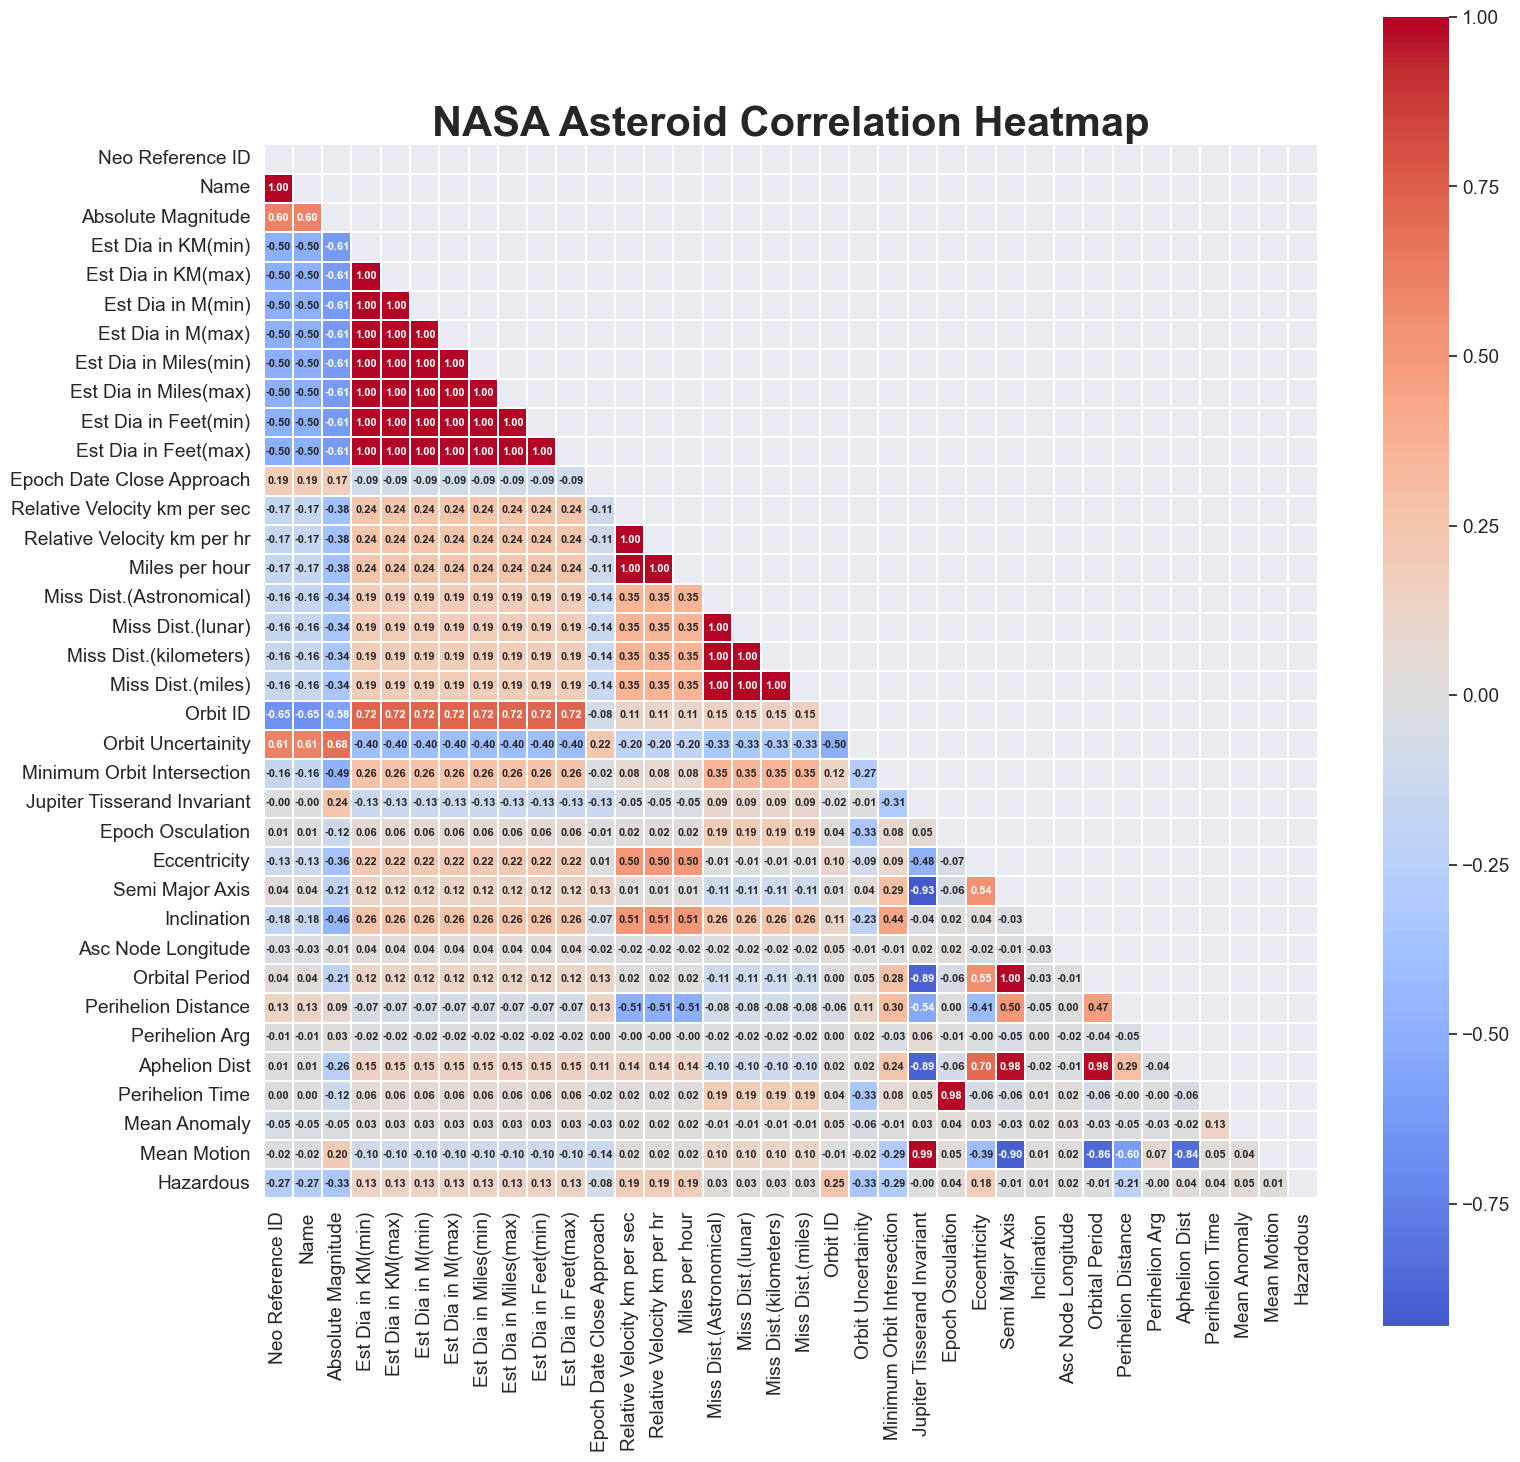

In [10]:
fig, ax = plt.subplots(figsize=(17,17))
ax.set_ylim([0,40])

# a mask is used to cover up the redundant, confusing half
mask = np.triu(np.ones_like(nasa_corr, dtype=bool))

sns.set(font_scale= 1.25)
sns.heatmap(nasa_corr, cmap="coolwarm", xticklabels=1, yticklabels=1, annot=True, annot_kws={"fontsize":8}, 
            mask=mask, center=0, square= True, linewidths = .2, ax=ax, fmt=".2f")

for text in ax.texts:
    text.set_weight('bold')
    
plt.title("NASA Asteroid Correlation Heatmap", fontsize= 30, weight="bold")   

# save plot
plt.savefig('nasa_heatmap_half.jpg')

plt.show()

### Correlation Matrix Analysis

**The correlation heatmap provides the following insights: a positive correlation means that there is a positive relationship between two data features, and a negative relationship indicates a negative relationship between two data features. It also can be used to identify outliers and whether or not colinearity happens.The sns heatmap did not provide any correlation in these 4 columns: *Close Approach Date*, *Orbiting Body*, *Orbit Determination Date* as well as *Equinox*, this is due to the fact those 4 features are object datatype, not numerical datatype, suggesting we can EITHER eliminate those features if they are uncorrelated, or CONVERT THEM using `sklearn.preprocessing import OneHotEncoder`**. 

**During this step, we will first have to separate the 4 object data features into data-type features vs. categorical features, where the data-type features are *Closing Approach Date* and *Orbit Determination Date*, and categorical feature are *Orbiting Body* and *Equinox***.

In [11]:
# Display the categorical attributes
print(Fore.BLACK+ Back.WHITE + "Categorical Features:",Style.RESET_ALL)
print(nasa.select_dtypes(include=['object']).columns)

#https://pypi.org/project/colorama/

Categorical Features: 
Index(['Close Approach Date', 'Orbiting Body', 'Orbit Determination Date',
       'Equinox'],
      dtype='object')


In [12]:
# check columns for below categorical data features, Orbiting Body also has one label whcih is Earth, and Equinox only has J2000
nasa.loc[:, ['Orbiting Body', 'Equinox']].head()

,Orbiting Body,Equinox
0,Earth,J2000
1,Earth,J2000
2,Earth,J2000
3,Earth,J2000
4,Earth,J2000


In [13]:
#check columns for the remaining two categorical data features.
nasa.loc[:, ['Close Approach Date', 'Orbit Determination Date']].head()

,Close Approach Date,Orbit Determination Date
0,1/1/1995,4/6/2017 8:36
1,1/1/1995,4/6/2017 8:32
2,1/8/1995,4/6/2017 9:20
3,1/15/1995,4/6/2017 9:15
4,1/15/1995,4/6/2017 8:57


In [14]:
# We define date columns and categorical columns 
date_cols = ['Close Approach Date', 'Orbit Determination Date']
category_cols = ['Orbiting Body', 'Equinox']

In [15]:
# Dates Normalzation process: convert date_cols to nanoseconds
import calendar
from datetime import datetime
from numpy import int64

#Pandas cannot convert datetimes to int32, so raised error. If convert to np.int64 it working, also working convert numpy array converted to int with wrong values or convert to int64 
#- then get datetimes in native format in nanoseconds 10^9:
for col in date_cols:
    nasa[col] = pd.to_datetime(nasa[col]).astype(int64)/(10**9)
    
#https://stackoverflow.com/questions/56307152/python-3-typeerror-cannot-astype-a-datetimelike-from-datetime64ns-to-int
#https://stackoverflow.com/questions/56986205/nameerror-name-int64-is-not-defined

casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.


In [16]:
# One Hot Encoder Method: this step is optional but I implemented anyway for practice purpose
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
cat_encoded = cat_encoder.fit_transform(nasa[category_cols]).toarray()
#cat_encoded

# We convert numpy array to a Pandas dataframe, this is because Pandas is more robust of performing complex
# operations like group by, multi-level,etc in addition to the functionalities from NumPy. Numpy Arrays has more limited capacities.
cat_encoded_pd = pd.DataFrame(cat_encoded, columns=cat_encoder.get_feature_names_out(category_cols))

# Since we have noticed from the RAW Dataset that both features only has 1 label type across all data entries, we can omit these two.
#aka the category_cols
nasa_cat_dropped = nasa.drop(category_cols, axis=1)

#Reference:
#1. AurelienGeron . 2019. Hands On Machine Learning with Scikit Learn, Keras , and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems (2nd.ed.). O'Reilly Media, Inc. p.65-67.
#2. https://www.knowledgehut.com/blog/data-science/pandas-vs-numpy

In [17]:
# Combine encoded categorical features with the rest of the dataset
encoded_nasa = pd.concat([nasa_cat_dropped, cat_encoded_pd], axis=1)
encoded_nasa

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous,Orbiting Body_Earth,Equinox_J2000
0,3703080,3703080,21.600,0.127220,0.284472,127.219878,284.472297,0.079051,0.176763,417.388066,...,609.599786,0.808259,57.257470,2.005764,2458161.642,264.837533,0.590551,True,1.0,1.0
1,3723955,3723955,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,425.869294,0.718200,313.091975,1.497352,2457794.969,173.741112,0.845330,False,1.0,1.0
2,2446862,2446862,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,643.580228,0.950791,248.415038,1.966857,2458120.468,292.893654,0.559371,True,1.0,1.0
3,3092506,3092506,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,514.082140,0.983902,18.707701,1.527904,2457902.337,68.741007,0.700277,False,1.0,1.0
4,3514799,3514799,21.600,0.127220,0.284472,127.219878,284.472297,0.079051,0.176763,417.388066,...,495.597821,0.967687,158.263596,1.483543,2457814.455,135.142133,0.726395,True,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,3759007,3759007,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,...,457.179984,0.741558,276.395697,1.581299,2457708.228,304.306024,0.787436,False,1.0,1.0
4683,3759295,3759295,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,...,407.185767,0.996434,42.111064,1.153835,2458087.617,282.978786,0.884117,False,1.0,1.0
4684,3759714,3759714,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501181,...,690.054279,0.965760,274.692712,2.090708,2458300.480,203.501147,0.521698,False,1.0,1.0
4685,3759720,3759720,21.800,0.116026,0.259442,116.025908,259.441818,0.072095,0.161210,380.662441,...,662.048343,1.185467,180.346090,1.787733,2458288.261,203.524965,0.543767,False,1.0,1.0


In [18]:
# Check current data features in new encoded NASA dataset:
encoded_nasa.columns

Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbit ID',
       'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Hazardous', 'Orbiting Body_Earth', 'Equinox_J2000'],
      dtype='object')

In [19]:
len(encoded_nasa.columns) # retain the equal number of data features as the original dataset

40

**Notice from above columns, 
'Est Dia in KM(min)','Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
'Est Dia in Miles(min)', 'Est Dia in Miles(max)','Est Dia in Feet(min)', 'Est Dia in Feet(max)' refer to the same Estimated Diameter of the Asteroid but in different units. Since NASA uses metric system, we will keep 'Est Dia in M(min)', 'Est Dia in M(max)', and drop the other 4 data features.In addition, we can also drop 'Orbiting Body_Earth', 'Equinox_J2000' drop 'Orbiting Body_Earth', 'Equinox_J2000', since all the column values have the value of 1, we remove constant features.**


In [20]:
nasa_dropped = encoded_nasa.drop(['Est Dia in KM(min)','Est Dia in KM(max)', 'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)','Orbiting Body_Earth', 'Equinox_J2000'], axis=1 )
#nasa_dropped.info()

In [21]:
nasa_dropped.columns

Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in M(min)',
       'Est Dia in M(max)', 'Close Approach Date', 'Epoch Date Close Approach',
       'Relative Velocity km per sec', 'Relative Velocity km per hr',
       'Miles per hour', 'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbit ID',
       'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Hazardous'],
      dtype='object')

In [22]:
len(nasa_dropped.columns) # updated columns # in a new dataframe

32

## Feature Selection

Now we need to only retain features in the dataframe that actually help with the machine learning model. We first use Correlation Matrix and check whether Multicollineartiy exists. A good indicator of multicollinearity is the variance inflation factor(VIF). According to article #3, we should remove constant features, Quasi-Constant features as well as duplicated features, an example of Quasi-Constant features will be the data_cols, aka 'Close Approach Date' and 'Orbit Determination Date', hence we can drop them.


1. https://www.statology.org/multicollinearity-in-python/#:~:text=The%20most%20straightforward%20way%20to,between%201%20and%20positive%20infinity.
2.https://towardsdatascience.com/are-you-dropping-too-many-correlated-features-d1c96654abe6
3. https://stackabuse.com/applying-filter-methods-in-python-for-feature-selection/
4. https://www.projectpro.io/recipes/drop-out-highly-correlated-features-in-python


In [23]:
#check dates format of date_cols
encoded_nasa.loc[:, ['Close Approach Date', 'Orbit Determination Date']].tail(5)

,Close Approach Date,Orbit Determination Date
4682,1.473293e+09,1.491467e+09
4683,1.473293e+09,1.491467e+09
4684,1.473293e+09,1.491467e+09
4685,1.473293e+09,1.491467e+09
4686,1.473293e+09,1.493447e+09


In [24]:
nasa_dropped_new = nasa_dropped.drop(['Neo Reference ID','Close Approach Date', 'Orbit Determination Date','Miss Dist.(lunar)', 'Miss Dist.(kilometers)', 'Miss Dist.(miles)','Relative Velocity km per hr'], axis=1)

In [25]:
len(nasa_dropped_new.columns)

25

In [26]:
# SelectKBest method used to evaluate most important features.
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif # for classification

#filter out our Hazardous variblae(Target variable)
X = nasa_dropped_new[[val for val in nasa_dropped_new.columns if val !='Hazardous']]
y = nasa_dropped_new['Hazardous']

#nasa_dropped_new.head()

# Create a function that takes in X,y variables, with criteria, and returns a dataframe with most important columns
# based on criteria

def featureSelect_dataframe(X,y, criteria, k):
    # Create the function method
    reg = SelectKBest(criteria, k=k).fit(X,y)
    # transform after creating the function method
    X_transformed = reg.transform(X)
    # filter down X based on kept columns
    X = X[[val for i,val in enumerate(X.columns) if reg.get_support()[i]]]    
    return X

# chi2 method: Chi-squared stats of non-negative features for classification tasks.
New_X = featureSelect_dataframe(X,y, chi2, 10)
New_X


#Reference:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html
#https://enjoymachinelearning.com/blog/feature-selection-selectkbest-sklearn/

,Name,Absolute Magnitude,Est Dia in M(min),Est Dia in M(max),Epoch Date Close Approach,Relative Velocity km per sec,Miles per hour,Orbit ID,Orbit Uncertainity,Mean Anomaly
0,3703080,21.600,127.219878,284.472297,789000000000,6.115834,13680.509940,17,5,264.837533
1,3723955,21.300,146.067964,326.617897,789000000000,18.113985,40519.173110,21,3,173.741112
2,2446862,20.300,231.502122,517.654482,790000000000,7.590711,16979.661800,22,0,292.893654
3,3092506,27.400,8.801465,19.680675,790000000000,11.173875,24994.839860,7,6,68.741007
4,3514799,21.600,127.219878,284.472297,790000000000,9.840831,22012.954980,25,1,135.142133
...,...,...,...,...,...,...,...,...,...,...
4682,3759007,23.900,44.111820,98.637028,1470000000000,22.154265,49556.875550,4,8,304.306024
4683,3759295,28.200,6.089126,13.615700,1470000000000,3.225150,7214.337772,2,6,282.978786
4684,3759714,22.700,76.657557,171.411509,1470000000000,7.191642,16086.983630,17,6,203.501147
4685,3759720,21.800,116.025908,259.441818,1470000000000,11.352090,25393.489070,6,5,203.524965


In [27]:
# f_classif method: ANOVA F-value between label/feature for classification tasks
New_X = featureSelect_dataframe(X, y, f_classif, 10)
New_X


,Name,Absolute Magnitude,Est Dia in M(max),Relative Velocity km per sec,Miles per hour,Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Eccentricity,Perihelion Distance
0,3703080,21.600,284.472297,6.115834,13680.509940,17,5,0.025282,0.425549,0.808259
1,3723955,21.300,326.617897,18.113985,40519.173110,21,3,0.186935,0.351674,0.718200
2,2446862,20.300,517.654482,7.590711,16979.661800,22,0,0.043058,0.348248,0.950791
3,3092506,27.400,19.680675,11.173875,24994.839860,7,6,0.005512,0.216578,0.983902
4,3514799,21.600,284.472297,9.840831,22012.954980,25,1,0.034798,0.210448,0.967687
...,...,...,...,...,...,...,...,...,...,...
4682,3759007,23.900,98.637028,22.154265,49556.875550,4,8,0.019777,0.361512,0.741558
4683,3759295,28.200,13.615700,3.225150,7214.337772,2,6,0.006451,0.073200,0.996434
4684,3759714,22.700,171.411509,7.191642,16086.983630,17,6,0.059972,0.368055,0.965760
4685,3759720,21.800,259.441818,11.352090,25393.489070,6,5,0.177510,0.202565,1.185467


In [28]:
# mutual_info_classif method: Mutual information for a discrete target.
New_X = featureSelect_dataframe(X, y, mutual_info_classif, 10)
New_X
    

,Name,Absolute Magnitude,Est Dia in M(min),Est Dia in M(max),Orbit ID,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Asc Node Longitude,Perihelion Distance,Aphelion Dist
0,3703080,21.600,127.219878,284.472297,17,0.025282,4.634,314.373913,0.808259,2.005764
1,3723955,21.300,146.067964,326.617897,21,0.186935,5.457,136.717242,0.718200,1.497352
2,2446862,20.300,231.502122,517.654482,22,0.043058,4.557,259.475979,0.950791,1.966857
3,3092506,27.400,8.801465,19.680675,7,0.005512,5.093,57.173266,0.983902,1.527904
4,3514799,21.600,127.219878,284.472297,25,0.034798,5.154,84.629307,0.967687,1.483543
...,...,...,...,...,...,...,...,...,...,...
4682,3759007,23.900,44.111820,98.637028,4,0.019777,5.156,164.183305,0.741558,1.581299
4683,3759295,28.200,6.089126,13.615700,2,0.006451,5.742,345.225230,0.996434,1.153835
4684,3759714,22.700,76.657557,171.411509,17,0.059972,4.410,37.026468,0.965760,2.090708
4685,3759720,21.800,116.025908,259.441818,6,0.177510,4.477,163.802909,1.185467,1.787733


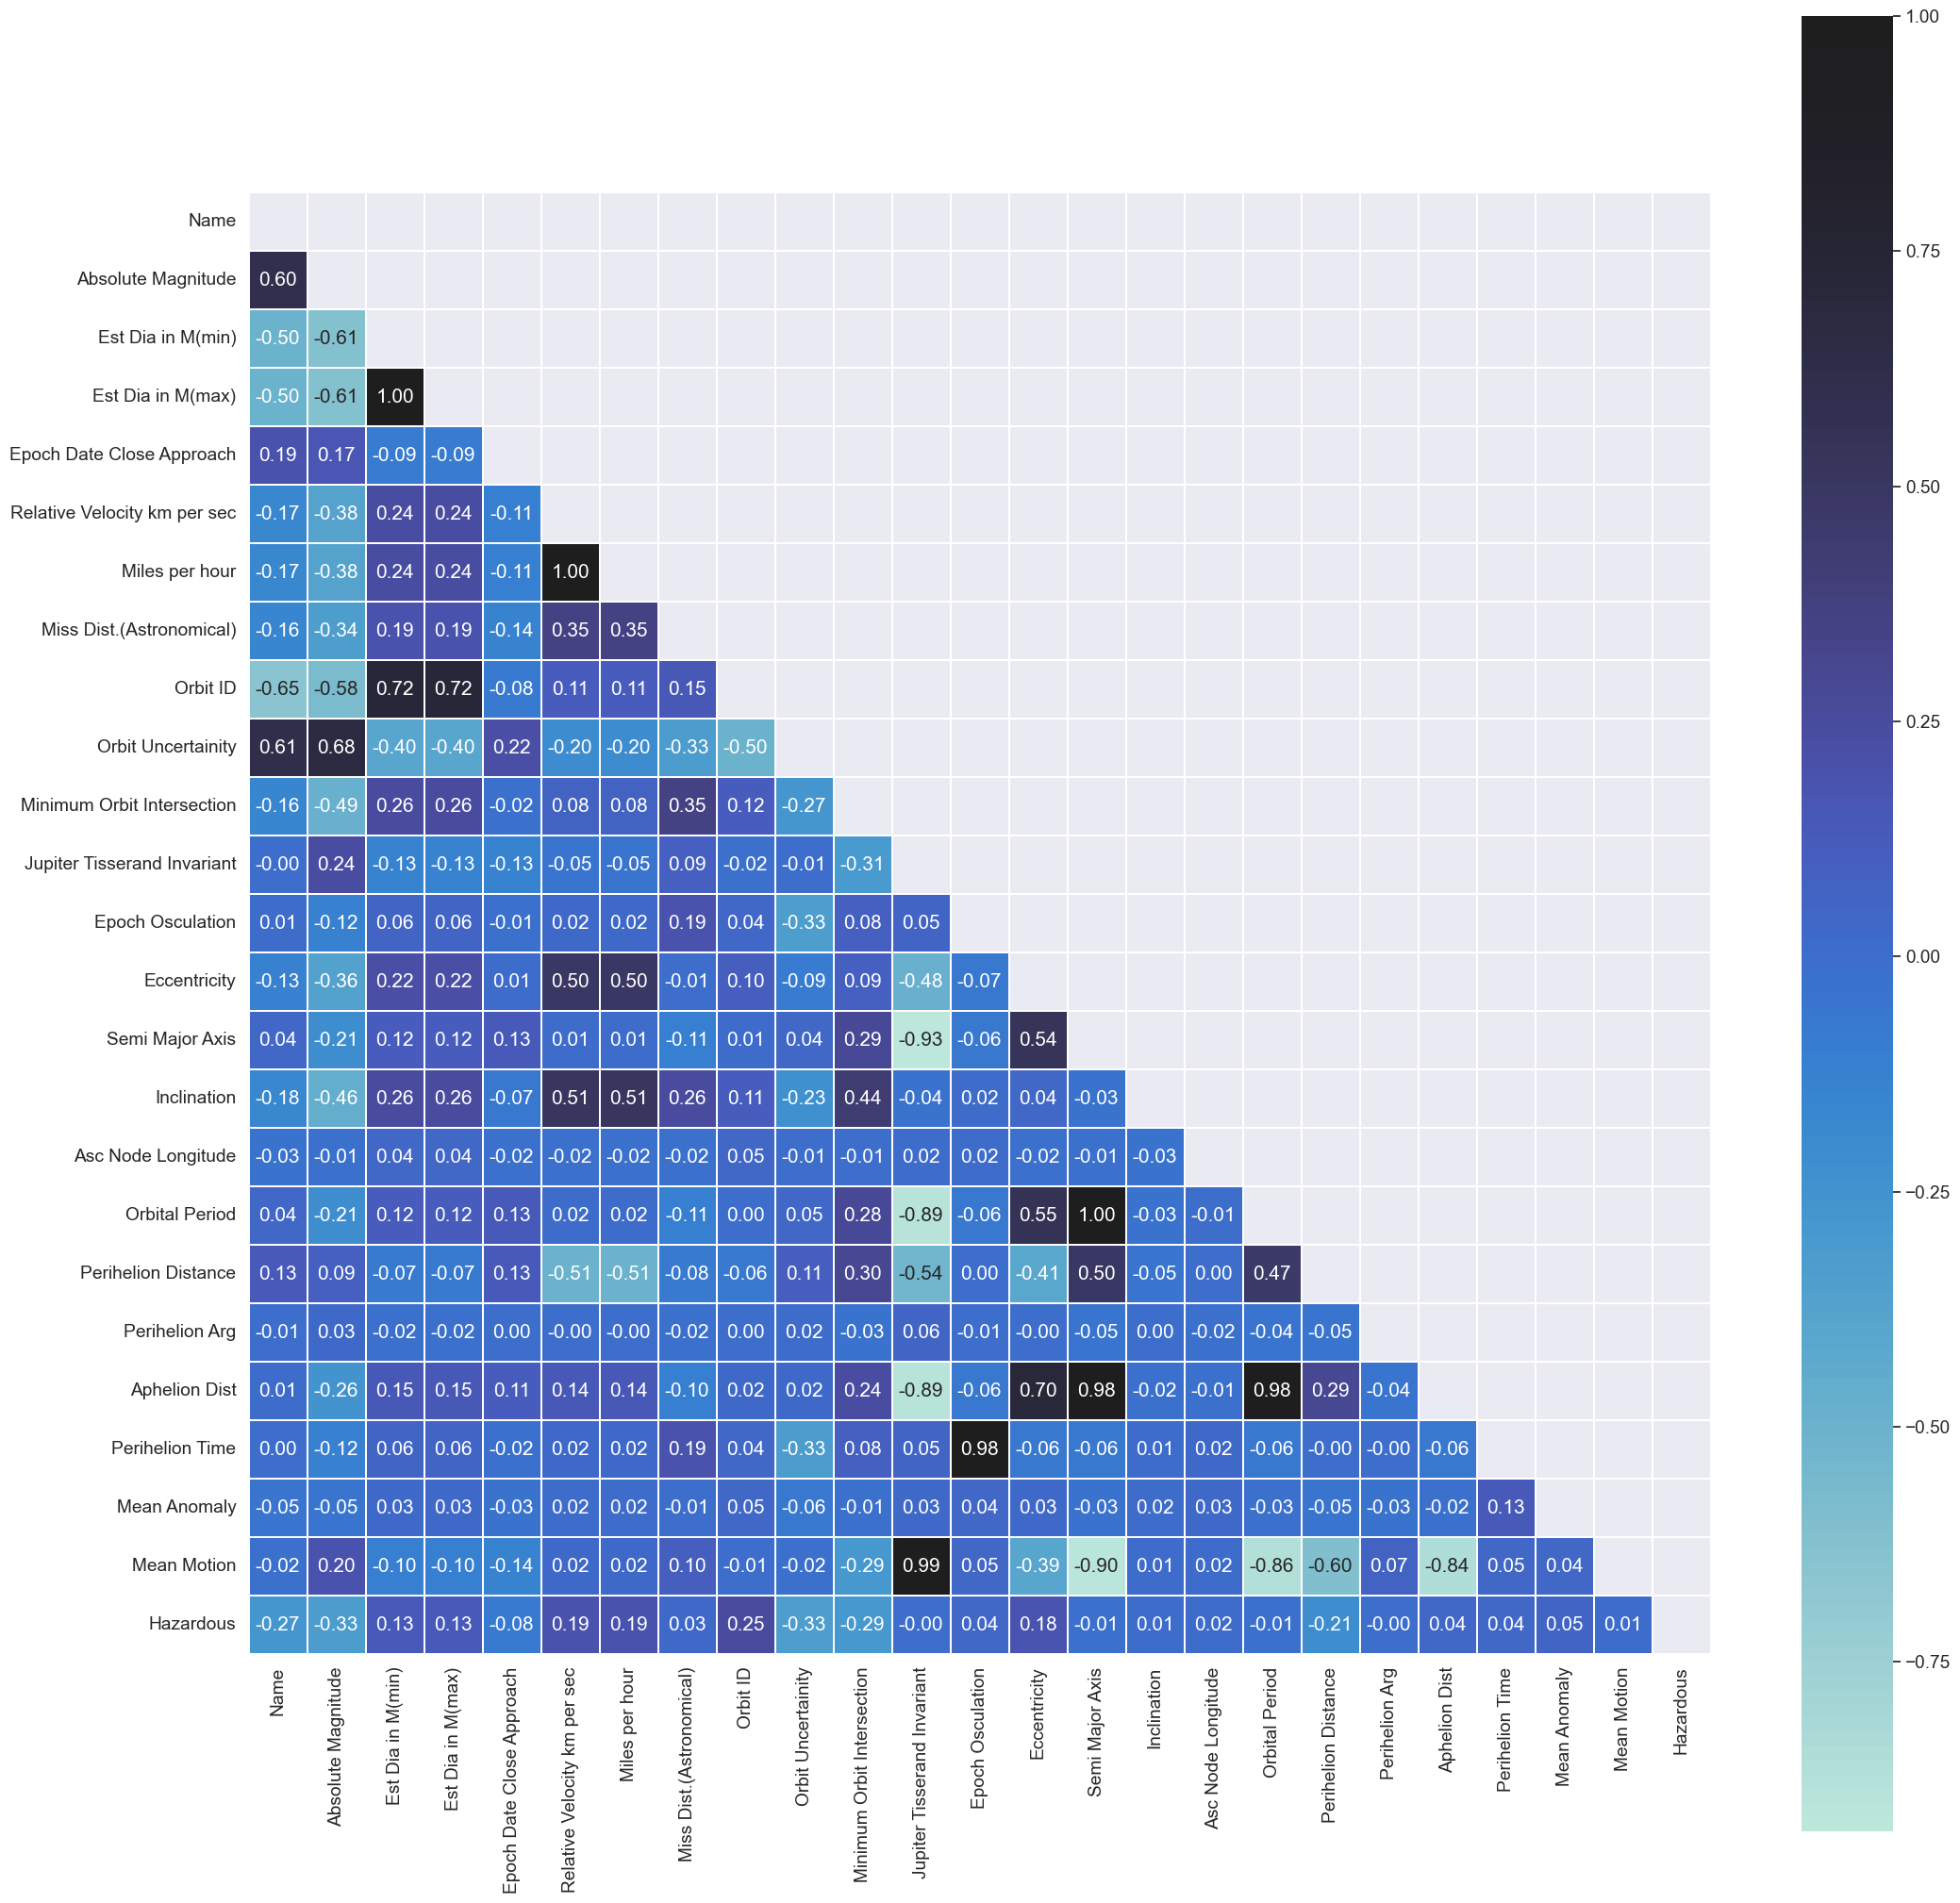

In [29]:
# First we create a new correlation matrix based on the new dataframe with 25 remaining features

correlation_matrix = nasa_dropped_new.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=np.bool_))
f, ax = plt.subplots(figsize=(25,25))
cmap = sns.diverging_palette(255, 0, as_cmap=True)

sns.set(font_scale= 1.25)
sns.heatmap(correlation_matrix, mask=mask, vmax=None, xticklabels=1, yticklabels=1,center = 1, square= True, annot=True,
           linewidth = .3, ax=ax, fmt=".2f")

upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool_))

#Reference

#1 https://www.python-graph-gallery.com/92-control-color-in-seaborn-heatmaps

In [30]:
# Based on Kaggle's Comprehensive Guide on Feature Selection, it's recommended to drop feature columns with correlation > 0.9

features_to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column]>0.9)]
print(features_to_drop)

# Reference
#1.https://www.kaggle.com/code/prashant111/comprehensive-guide-on-feature-selection

['Est Dia in M(max)', 'Miles per hour', 'Orbital Period', 'Aphelion Dist', 'Perihelion Time', 'Mean Motion']


**From above result, we can see that these six additional features can be eliminated: 'Est Dia in M(max)', 'Miles per hour', 'Orbital Period', 'Aphelion Dist', 'Perihelion Time', 'Mean Motion'.**

In [31]:
nasa_dropped_new.columns

Index(['Name', 'Absolute Magnitude', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Miles per hour', 'Miss Dist.(Astronomical)', 'Orbit ID',
       'Orbit Uncertainity', 'Minimum Orbit Intersection',
       'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Eccentricity',
       'Semi Major Axis', 'Inclination', 'Asc Node Longitude',
       'Orbital Period', 'Perihelion Distance', 'Perihelion Arg',
       'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion',
       'Hazardous'],
      dtype='object')

In [32]:
nasa_dropped_cleaned = nasa_dropped_new.drop(['Est Dia in M(max)', 'Miles per hour', 'Orbital Period', 'Aphelion Dist', 'Perihelion Time', 'Mean Motion'],
                                            axis=1)

In [33]:
nasa_dropped_cleaned.columns

Index(['Name', 'Absolute Magnitude', 'Est Dia in M(min)',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Miss Dist.(Astronomical)', 'Orbit ID', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Perihelion Distance', 'Perihelion Arg',
       'Mean Anomaly', 'Hazardous'],
      dtype='object')

In [34]:
len(nasa_dropped_cleaned.columns)

19

In [35]:
features = nasa[['Name', 'Absolute Magnitude', 'Est Dia in M(min)',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Miss Dist.(Astronomical)', 'Orbit ID', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Perihelion Distance', 'Perihelion Arg',
       'Mean Anomaly']]

target= nasa['Hazardous']

In [36]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [37]:
import mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.svm import SVC
svc = SVC()
sfs = SFS(svc, k_features ='best', forward = True, floating = False, verbose = 2, scoring = "accuracy", cv=0)
fs_svc = sfs.fit(features,target)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   21.5s finished

[2023-08-15 23:48:25] Features: 1/18 -- score: 0.8395562193300619[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   21.5s finished

[2023-08-15 23:48:47] Features: 2/18 -- score: 0.849583955621933[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:   21.7s finished

[2023-08-15 23:49:08] Features: 3/18 -- score: 0.855344570087476[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars


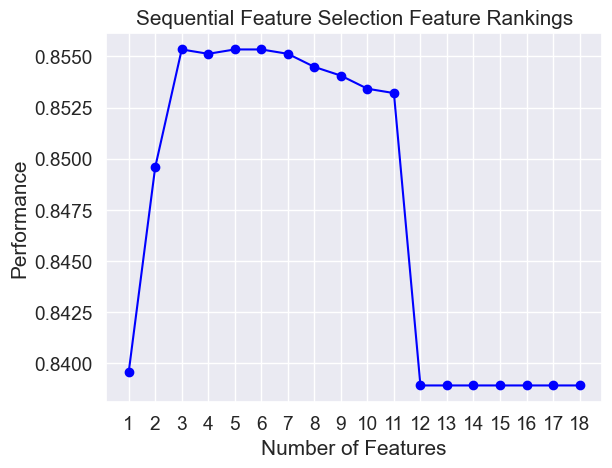

In [38]:
plot_sfs(sfs.get_metric_dict(confidence_interval=0.95), kind='std_err')
plt.grid(visible=True, which='major', axis ='both')
plt.title('Sequential Feature Selection Feature Rankings')
plt.savefig('D:/Documents/CU Boulder/5506 Data Mining Project/DTSA5506 Data Mining Project/Output/SFS_Feature_Ranking.jpg')
plt.show()

In [39]:
# Net we want to use Xgboost Built-in Feature Importance to rank the remaining 18 data features exclduing the target variable
# Hazardous
from sklearn.inspection import permutation_importance
from xgboost import XGBClassifier

#turn off warning messages of depreciation warning in xgboost
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

X= features
y = target

#Split the dataset to training and test dataset on the 80%:20% ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=10)

#print(X_train.shape)
#print(y_train.shape)

xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train, y_train)
xgb.feature_importances_

#https://mljar.com/blog/feature-importance-xgboost/

[23:51:53] WARNING: C:\Users\dev-admin\croot\xgboost-split_1675120659361\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([0.01949317, 0.6267153 , 0.        , 0.01204843, 0.00558535,
       0.00421141, 0.00973047, 0.01248929, 0.2581163 , 0.0168327 ,
       0.        , 0.00806649, 0.0008188 , 0.00655513, 0.00558748,
       0.00438895, 0.00606349, 0.00329716], dtype=float32)

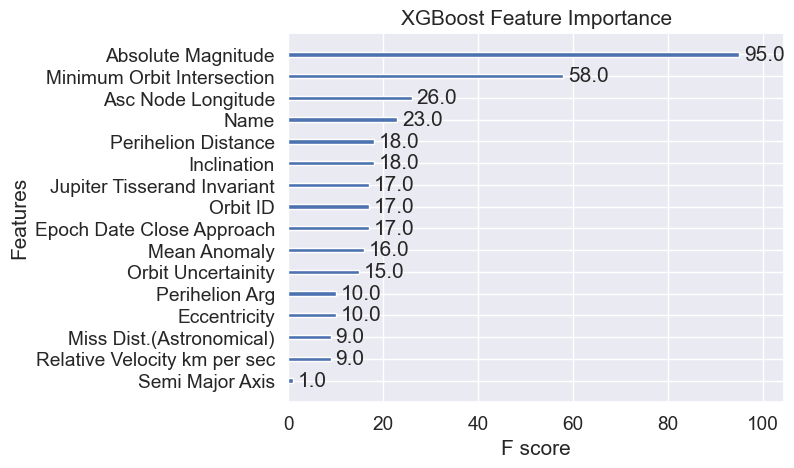

In [40]:
from xgboost import plot_importance

#turn off warning messages of depreciation warning in xgboost
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

model = XGBClassifier(verbosity=0, silent = True, use_label_encoder=False)
model.fit(X,y)
plot_importance(model)
plt.title('XGBoost Feature Importance')
plt.savefig('D:/Documents/CU Boulder/5506 Data Mining Project/DTSA5506 Data Mining Project/Output/XGBoost Feature Importance.jpg')
plt.show()

#Reference:
#1. https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/

In [41]:
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from numpy import sort
from xgboost import XGBClassifier

#turn off warning messages of depreciation warning in xgboost
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# # select features using threshold
# selection = SelectFromModel(model, threshold=thresh, prefit=True)
# select_X_train = selection.transform(X_train)

# # train model
# selection_model = XGBClassifier(verbosity=0, silent = True, use_label_encoder =False)
# selection_model.fit(select_X_train, y_train)

# # evaluate model
# select_X_test = selection.transform(X_test)
# y_pred = selection_model.predict(select_X_test)

# define custom class to fix bug in xgboost 
class MyXGBClassifier(XGBClassifier):
 @property
 def coef_(self):
     return None

# make predictions for test data and evaluate
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100))

# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
# select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = XGBClassifier(verbosity=0, silent = True, use_label_encoder =False)
    selection_model.fit(select_X_train, y_train)
    # evaluate model
    select_X_test = selection.transform(X_test)
    predictions = selection_model.predict(select_X_test)
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Accuracy: 100.00%
Thresh=0.000, n=18, Accuracy: 100.00%
Thresh=0.000, n=18, Accuracy: 100.00%
Thresh=0.001, n=16, Accuracy: 100.00%
Thresh=0.003, n=15, Accuracy: 100.00%
Thresh=0.004, n=14, Accuracy: 100.00%
Thresh=0.004, n=13, Accuracy: 100.00%
Thresh=0.004, n=12, Accuracy: 100.00%
Thresh=0.005, n=11, Accuracy: 100.00%
Thresh=0.005, n=10, Accuracy: 100.00%
Thresh=0.006, n=9, Accuracy: 100.00%
Thresh=0.007, n=8, Accuracy: 100.00%
Thresh=0.008, n=7, Accuracy: 100.00%
Thresh=0.008, n=6, Accuracy: 99.89%
Thresh=0.008, n=5, Accuracy: 100.00%
Thresh=0.013, n=4, Accuracy: 100.00%
Thresh=0.018, n=3, Accuracy: 100.00%
Thresh=0.254, n=2, Accuracy: 100.00%
Thresh=0.651, n=1, Accuracy: 81.56%


**From XGBClassifer results, we can see that the accuracy reached 100% and with just two top features which is Absolute Magnitude and Minimum Orbit Intersection, we are able to have 100% accuracy in prediction. Another interesting observation is that if we choose from top 5 to top 6 features(including Inclination), the accuracy decreases to 99.89%.**

In [42]:
# Calculate feature importances
importances = model.feature_importances_

print(Fore.MAGENTA+ Back.BLACK +'Model Feature Importances Scores: ', Style.RESET_ALL)
print((model.feature_importances_) * 100)

# Organizing the feature importance in dictionary:
# The key value depends on the maximum number of features: we will see the entire features
key_list = range(0, 18, 1)
feature_importance_dict = dict(zip(key_list, importances))

# lambda takes the single argument x and returns x[1], i.e, the item at index 1 in x
sort_feature_importance_dict = dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True))
print("\n")

print(Fore.YELLOW+ Back.BLACK +'Feature Importance Dictionary (Sorted): ', Style.RESET_ALL, sort_feature_importance_dict)

print("\n")

# Removing the features that have value zero in feature importance:
filtered_feature_importance_dict = {x:y for x,y in sort_feature_importance_dict.items() if y!=0}
print(Fore.GREEN+ Back.BLACK +'Filtered Feature Importance Dictionary: ', Style.RESET_ALL, filtered_feature_importance_dict)

f_indices = list(filtered_feature_importance_dict.keys())
f_indices = np.asarray(f_indices)

print(f_indices)

#X_train = X_train.loc[:, f_indices]
#X_test = X_test.loc[:, f_indices]

#print('X Train Feature Importance: ')
# print(X_train)
# print("\n")
# print('X Test Feature Importance: ')
# print(X_test)

# Reference:
#1. https://stackoverflow.com/questions/16310015/what-does-this-mean-key-lambda-x-x1
#2. https://gist.github.com/yangshun/ffaf68380ef71c157c3b

Model Feature Importances Scores:  
[ 1.7998195  65.08279     0.          1.27888     0.35758543  0.29142404
  0.8400546   0.8383693  25.36337     0.8237667   0.          0.5456564
  0.12462215  0.6136108   0.49587646  0.7492355   0.43340456  0.36152428]


Feature Importance Dictionary (Sorted):   {1: 0.6508279, 8: 0.2536337, 0: 0.017998194, 3: 0.0127888, 6: 0.008400545, 7: 0.008383693, 9: 0.008237667, 15: 0.007492355, 13: 0.006136108, 11: 0.005456564, 14: 0.0049587646, 16: 0.0043340456, 17: 0.003615243, 4: 0.0035758542, 5: 0.0029142404, 12: 0.0012462215, 2: 0.0, 10: 0.0}


Filtered Feature Importance Dictionary:   {1: 0.6508279, 8: 0.2536337, 0: 0.017998194, 3: 0.0127888, 6: 0.008400545, 7: 0.008383693, 9: 0.008237667, 15: 0.007492355, 13: 0.006136108, 11: 0.005456564, 14: 0.0049587646, 16: 0.0043340456, 17: 0.003615243, 4: 0.0035758542, 5: 0.0029142404, 12: 0.0012462215}
[ 1  8  0  3  6  7  9 15 13 11 14 16 17  4  5 12]


**From above ranking results we can see that: 'Absolute Magnitute' is the most relevant feature followed by 'Minimum Orbit Intersection'， 'Orbit Intersection', 'Name', 'Epoch Date Close Approach', 'Epoch Date Close Approach','Orbit ID', 'Orbit Uncertainity', 'Jupiter Tisserand Invariant'，'Perihelion Distance', 'Inclination', 'Eccentricity', 'Asc Node Longitude', 'Perihelion Arg', 'Mean Anomaly', 'Relative Velocity km per sec' and 'Semi Major Axis'. We can also see why we didn't see
'Est Dia in M(min)' and 'Epoch Osculation' are listed in the Feature Importance F1 Score ranking graph, their score is 0 which suggests neither is relevant to predict whether an asteroid is hazardous or not, so we can drop these two features as well.**

In [43]:
nasa_dropped_cleaned.columns

Index(['Name', 'Absolute Magnitude', 'Est Dia in M(min)',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Miss Dist.(Astronomical)', 'Orbit ID', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Perihelion Distance', 'Perihelion Arg',
       'Mean Anomaly', 'Hazardous'],
      dtype='object')

In [44]:
# Drop irrlevant features with the F score on the bottom lower end.
cleaned_features = nasa_dropped_cleaned.drop(['Est Dia in M(min)', 'Epoch Osculation', 'Miss Dist.(Astronomical)', 'Semi Major Axis',
                                 'Relative Velocity km per sec'], axis=1)


In [45]:
cleaned_features.columns

Index(['Name', 'Absolute Magnitude', 'Epoch Date Close Approach', 'Orbit ID',
       'Orbit Uncertainity', 'Minimum Orbit Intersection',
       'Jupiter Tisserand Invariant', 'Eccentricity', 'Inclination',
       'Asc Node Longitude', 'Perihelion Distance', 'Perihelion Arg',
       'Mean Anomaly', 'Hazardous'],
      dtype='object')

In [46]:
len(cleaned_features.columns)

14

### Resolving Imbalance

After further filtering out un-needed features, we want to FIRST see the cleaned dataset is balanced or imbalanced.

 Before: 
Class=1, Count=755 (16.11%)
Class=0, Count=3932 (83.89%)


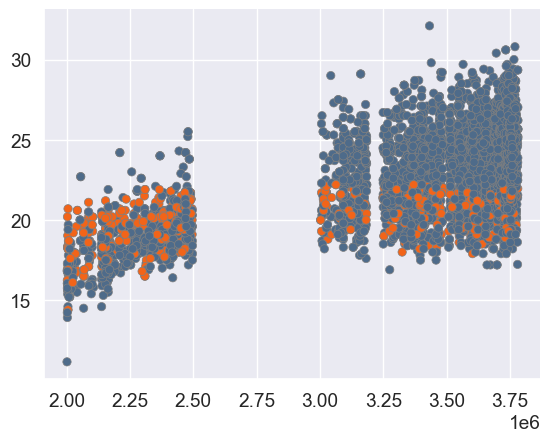

In [47]:
X = cleaned_features.drop(['Hazardous'], axis=1)
y =  cleaned_features.Hazardous

print(Fore.RED+ Back.BLACK, "Before:", Style.RESET_ALL)

from collections import Counter
count = Counter(cleaned_features['Hazardous'])
for label, records in count.items():
    percent = records/len(cleaned_features['Hazardous'])*100
    print('Class=%d, Count=%d (%.2f%%)' % (label, records, percent))

colors = ['#4E6B8A' if v == 0 else '#F26419' if v == 1 else '#F6AE2D' for v in y]
fig = plt.Figure(figsize=(12,8))
p1 = plt.scatter(X.iloc[:,0], X.iloc[:,1], c=colors, edgecolors='grey', linewidths = 0.5)
p1
sns.despine()


We can see that this dataset is imbalanced and we will use SMOTEENN(SMOTE+ENN) method from imblearn library to resolve this issue.SMOTE + ENN is another hybrid technique where more no. of observations are removed from the sample space. Here, ENN is yet another undersampling technique where the nearest neighbors of each of the majority class is estimated. If the nearest neighbors misclassify that particular instance of the majority class, then that instance gets deleted.

Integrating this technique with oversampled data done by SMOTE helps in doing extensive data cleaning. Here on misclassification by NN’s samples from both the classes are removed. This results in a more clear and concise class separation.

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}%'.format(logreg.score(X_test, y_test)*100))

Accuracy of logistic regression classifier on test set: 84.54%


 After: 
Class=0, Count=1857 (53.00%) 
Class=1, Count=1647 (47.00%) 


Text(0.5, 1.0, 'SMOTE+EEN')

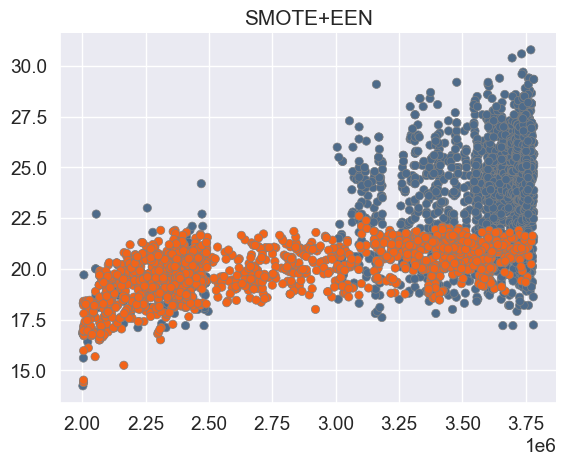

In [49]:
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

X = cleaned_features.drop(['Hazardous'], axis=1)
y =  cleaned_features.Hazardous

#resampling using SMOTEENN
smt = SMOTEENN(random_state = 0)
X,y = smt.fit_resample(X,y)

print(Fore.GREEN+ Back.BLACK, "After:", Style.RESET_ALL)
count = Counter(y)
for label, records in count.items():
    percent = records/len(y)*100
    print('Class=%d, Count=%d (%.2f%%) '  % (label, records, percent))

colors = ['#4E6B8A' if v == 0 else '#F26419' if v == 1 else '#F6AE2D' for v in y]
fig = plt.Figure(figsize=(12,8))
p2 = plt.scatter(X.iloc[:,0], X.iloc[:,1], c=colors, edgecolors='grey', linewidths = 0.5)
p2
sns.despine()
plt.title('SMOTE+EEN')
    
#Reference
#1. https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/
#2. https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
#3. https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTEENN.html
#4. https://www.kaggle.com/code/amidala/handling-imbalanced-data-with-resampling/notebook

### Logistic Regression 

The logistic regression is implemented in `LogisticRegression`. Despite its name, it is implemented as a linear model for classificaion rather than regression in terms of the scikit-learn/ML nomenclature. The logistic regression is also known as logit regression, maximum-entropy classification (MaxEnt) or the log-linear classifier. The default uses the $l_2$ regularization. 

**Logistic Regression Assumptions:**
- Binary logistic regression requires the dependent variable to be binary
- For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome
- Only the meaningful variable should be included
- The independent variables should be independent of each other. That is, the model should have little or no multicollinearity
- The independent variables are linearly related to the log odds
- Logistic regression requires large sample sizes



References:
1. https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
    

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [51]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}%'.format(logreg.score(X_test, y_test)*100))

Accuracy of logistic regression classifier on test set: 53.50%


**Notice that before and after the SMOTE-EEN method to balance the dataset, the accuracy score for the Logistic Regression went dow from 84.54% to 53.5%. This is normal because SMOTE technique creates sysnthetic data points based on the original data points and does not copy those data points but creates a slighly varied ones. The dataset is balanced so it will predict the minority classes better but the overal accuracy will decrease. Furthermore, the most crucial aspect about this result is that we should not rely on Accuracy score as the parameter to determine the performance. Instead, we can try $F_1$ score, AUC, Classification Report containing Recall, Precision to determine if the model has been improved or not.**

Reference:
1. https://stackoverflow.com/questions/76450720/problem-in-smote-oversampling-in-a-classification-problem
2. https://datascience.stackexchange.com/questions/28227/why-will-the-accuracy-of-a-highly-unbalanced-dataset-reduce-after-oversampling

In [52]:
# Create a function that can train and test the logistic regression model
from sklearn.metrics import precision_recall_fscore_support 
labels = cleaned_features.Hazardous.unique()

X = cleaned_features.drop(['Hazardous'], axis=1)
y = cleaned_features.Hazardous

#print(X_train.shape)
#print(y_train.shape)

#print(X_test.shape)
#print(y_test.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

def train_test_model(model, X_train, X_test, y_train, y_test, labels):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    metrics_report = classification_report(y_test, preds)
    precision, recall, fscore, train_support = precision_recall_fscore_support(y_test, preds, average="weighted")
    return preds, accuracy, metrics_report, (precision, recall, fscore)
    
    
log_model = LogisticRegression(penalty='l2', max_iter=1000)
predictions, accuracy, metrics_report, log_prf = train_test_model(log_model, X_train, X_test, y_train, y_test, labels)

print(Fore.RED, '\033[1m'+ 'Accuracy: {:.8f}%'.format(accuracy*100), Style.RESET_ALL)
print('\n')
print(metrics_report)


 Accuracy: 84.54157783% 


              precision    recall  f1-score   support

       False       0.85      1.00      0.92       793
        True       0.00      0.00      0.00       145

    accuracy                           0.85       938
   macro avg       0.42      0.50      0.46       938
weighted avg       0.71      0.85      0.77       938



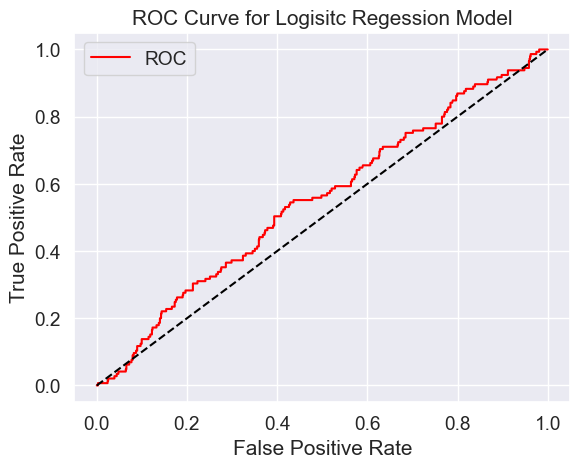

0.5495542896899595

In [53]:
# Plot ROC curve
#define metrics
from sklearn.metrics import roc_auc_score, roc_curve

X = cleaned_features.drop(['Hazardous'], axis=1)
y = cleaned_features.Hazardous

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='red', label="ROC")
    plt.plot([0,1], [0,1], color='black', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Logisitc Regession Model')
    plt.legend()
    plt.show()

y_pred_prob = log_model.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plot_roc_curve(fpr, tpr)

roc_auc_score(y_test, y_pred_prob)

#https://www.statology.org/plot-roc-curve-python/

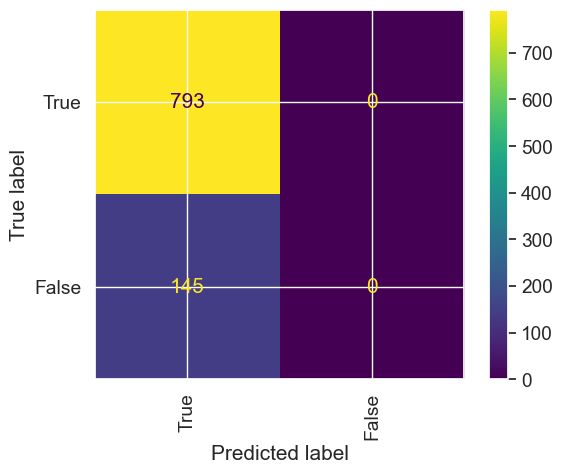

In [54]:
# Plot confusion matrix
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
ConfusionMatrixDisplay.from_estimator(log_model, X_test, y_test, display_labels = labels, xticks_rotation = 'vertical')

### Decision Trees

The basic idea behind any decision tree algorithm is as follows:
1. Select the best attribute using Attribute Selection measures(ASM) to split the records.
2. Make that attribute using a decision node and breaks the dataset into smaller subsets.
3. Start tree building by repeating this process recursively for each child until one of the conditions will match:
- All the tuples belong to the same attribute value
- There are no more remaining attributes.
- There are no more instance.


In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 
# Create Decision Tree Classifier object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

#Predict the response for the test dataset
y_pred = clf.predict(X_test)

# Evaluating the model with the accuracy score
accuracy = metrics.accuracy_score(y_test, y_pred)
print(Fore.RED, '\033[1m'+"Accuracy: {:.8f}%".format(accuracy*100))

#References:
#1. https://www.datacamp.com/tutorial/decision-tree-classification-python
#2. https://mljar.com/blog/visualize-decision-tree/

 Accuracy: 99.46695096%


In [56]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [57]:
X.columns

Index(['Name', 'Absolute Magnitude', 'Epoch Date Close Approach', 'Orbit ID',
       'Orbit Uncertainity', 'Minimum Orbit Intersection',
       'Jupiter Tisserand Invariant', 'Eccentricity', 'Inclination',
       'Asc Node Longitude', 'Perihelion Distance', 'Perihelion Arg',
       'Mean Anomaly'],
      dtype='object')

In [58]:
# Generate Decision Trees
import pydotplus
import graphviz
from sklearn.tree import export_graphviz
from six import StringIO
from sklearn import tree
from IPython.display import Image

text_representation = tree.export_text(clf)
print(text_representation)


|--- feature_5 <= 0.05
|   |--- feature_1 <= 21.98
|   |   |--- feature_1 <= 21.85
|   |   |   |--- class: True
|   |   |--- feature_1 >  21.85
|   |   |   |--- feature_7 <= 0.64
|   |   |   |   |--- class: True
|   |   |   |--- feature_7 >  0.64
|   |   |   |   |--- class: False
|   |--- feature_1 >  21.98
|   |   |--- feature_1 <= 22.15
|   |   |   |--- feature_5 <= 0.01
|   |   |   |   |--- class: False
|   |   |   |--- feature_5 >  0.01
|   |   |   |   |--- feature_0 <= 3520226.50
|   |   |   |   |   |--- feature_6 <= 6.50
|   |   |   |   |   |   |--- feature_7 <= 0.24
|   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |   |--- feature_7 >  0.24
|   |   |   |   |   |   |   |--- class: True
|   |   |   |   |   |--- feature_6 >  6.50
|   |   |   |   |   |   |--- class: False
|   |   |   |   |--- feature_0 >  3520226.50
|   |   |   |   |   |--- class: False
|   |   |--- feature_1 >  22.15
|   |   |   |--- feature_1 <= 22.25
|   |   |   |   |--- feature_6 <= 6.51
|   |  

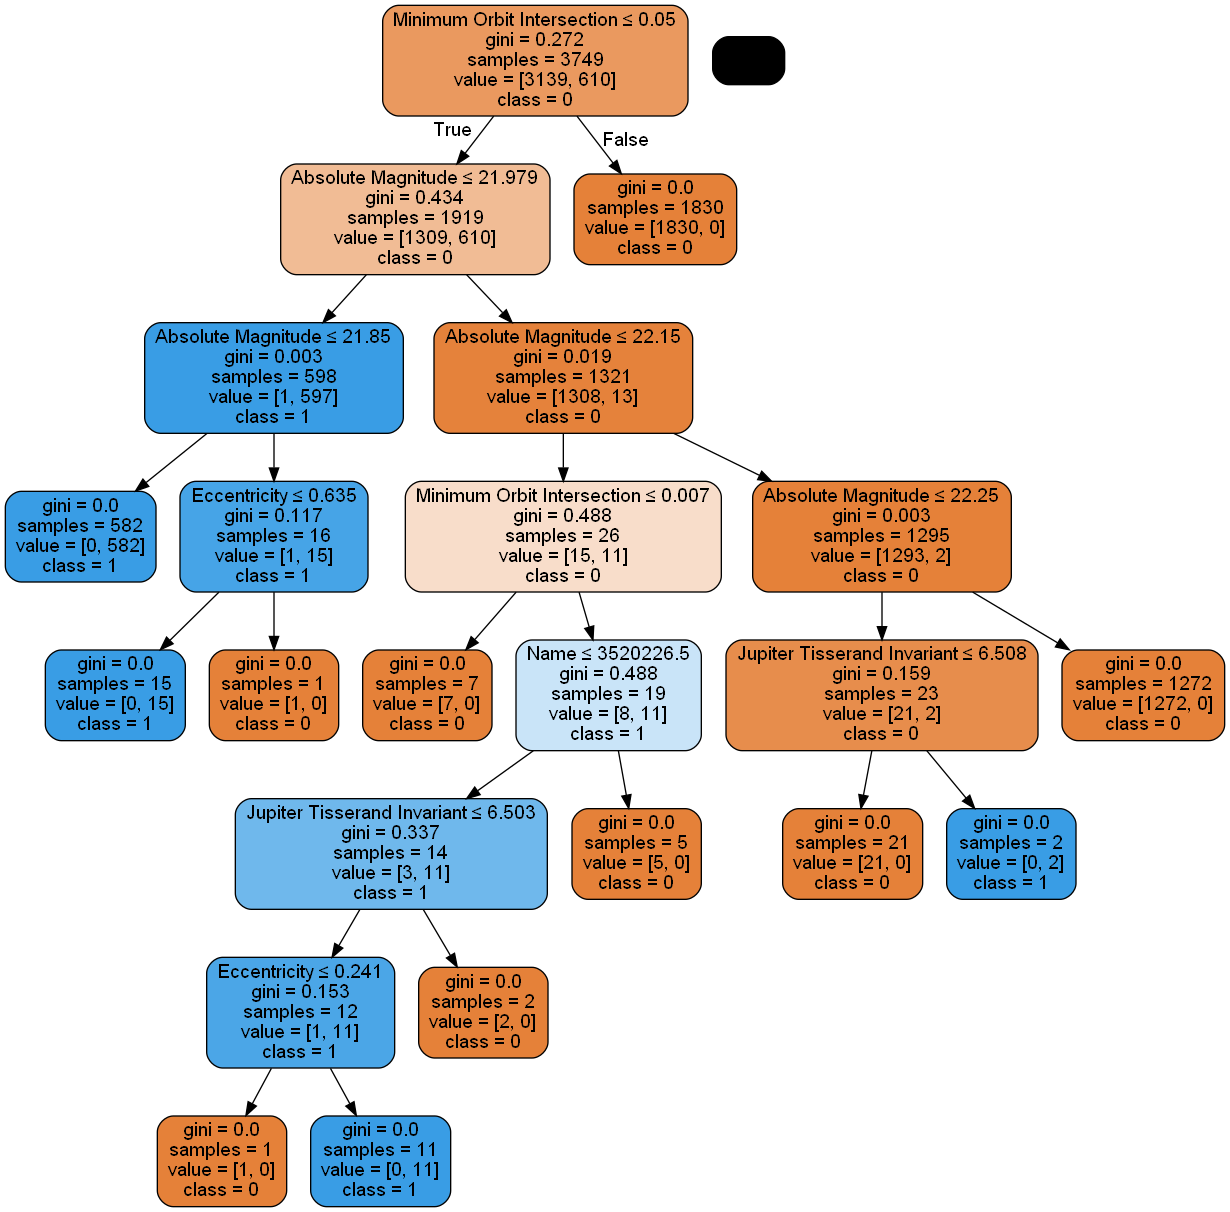

In [59]:
dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, filled = True, rounded=True, special_characters=True,
               feature_names=X.columns, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [60]:
print(clf.feature_importances_)

[0.00445316 0.79684715 0.         0.         0.         0.18867373
 0.00639566 0.0036303  0.         0.         0.         0.
 0.        ]


range(0, 13)


Text(0, 0.5, 'Feature Names')

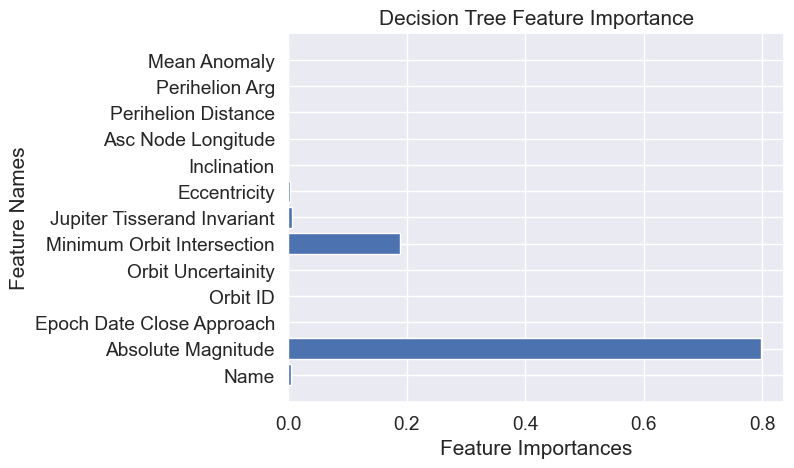

In [61]:
n_features = X_train.shape[1]
print(range(n_features))
plt.barh(range(n_features), clf.feature_importances_, align='center')
plt.yticks(ticks=np.arange(n_features), labels=X_train.columns)
plt.title('Decision Tree Feature Importance')
plt.xlabel('Feature Importances')
plt.ylabel('Feature Names')

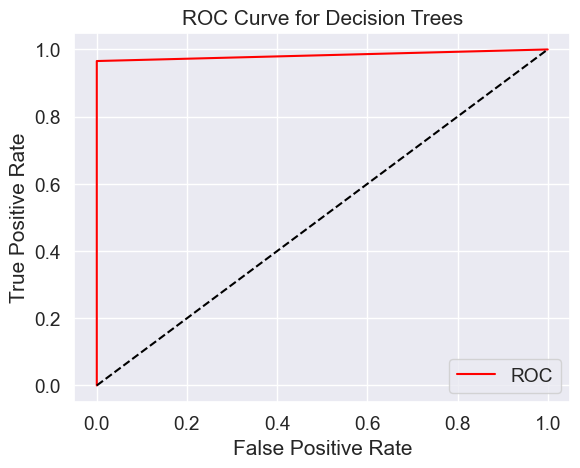

0.9827586206896552

In [62]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='red', label="ROC")
    plt.plot([0,1], [0,1], color='black', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Decision Trees')
    plt.legend()
    plt.show()
y_pred_prob = clf.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plot_roc_curve(fpr, tpr)

roc_auc_score(y_test, y_pred_prob)


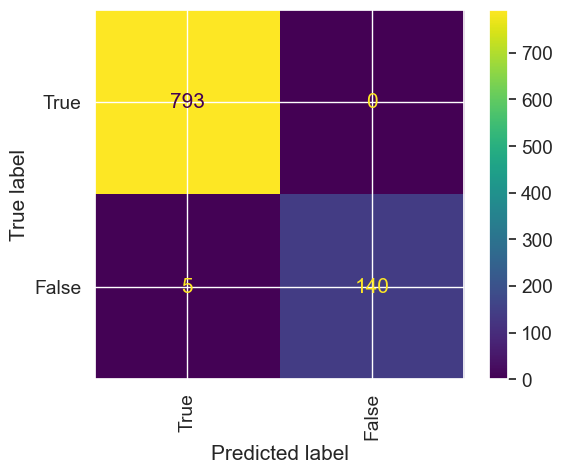

In [63]:
# Plot confusion matrix
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels = labels, xticks_rotation = 'vertical')

### Support Vector Machines

In [64]:
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn import svm
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X = cleaned_features.drop(['Hazardous'], axis=1)
y = cleaned_features.Hazardous

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

clf_svm = svm.SVC(kernel='linear', gamma='auto', probability=True)
clf_svm.fit(X_train, y_train)
y_pred = clf_svm.predict(X_test)

# Evaluating the model with the accuracy score
accuracy = metrics.accuracy_score(y_test, y_pred)
print(Fore.RED, '\033[1m'+"Accuracy: {:.8f}%".format(accuracy*100))

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


 Accuracy: 95.09594883%


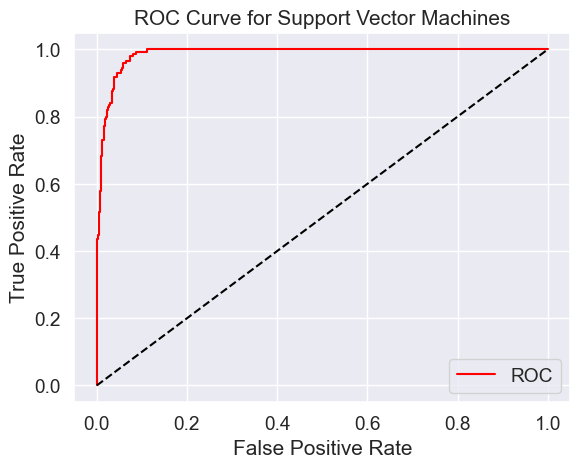

0.9869374266208636

In [65]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='red', label="ROC")
    plt.plot([0,1], [0,1], color='black', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Support Vector Machines')
    plt.legend()
    plt.show()
y_pred_prob = clf_svm.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plot_roc_curve(fpr, tpr)

roc_auc_score(y_test, y_pred_prob)


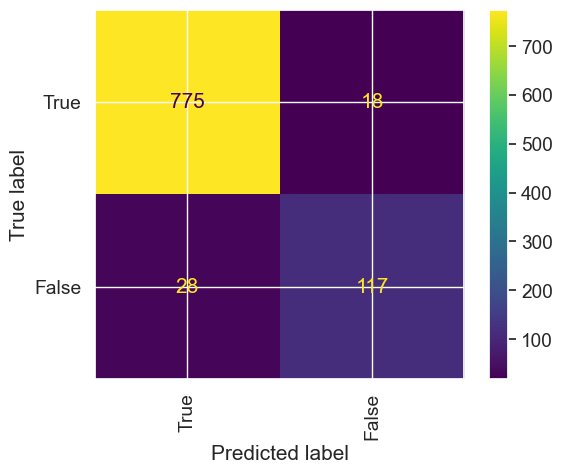

In [66]:
# Plot confusion matrix
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
ConfusionMatrixDisplay.from_estimator(clf_svm, X_test, y_test, display_labels = labels, xticks_rotation = 'vertical')

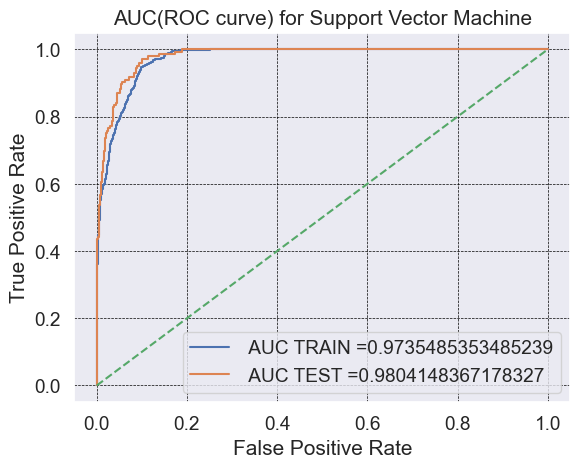

In [67]:
# A better ROC curve
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier	
from sklearn.metrics import roc_curve, auc
model = SGDClassifier(loss ='hinge',alpha = 0.0001, penalty='l2', class_weight='balanced')

model.fit(X_train, y_train)
y_train_pred = model.decision_function(X_train)
y_test_pred = model.decision_function(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.grid()
plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve) for Support Vector Machine")
plt.grid(color='black', linestyle='--', linewidth=0.5)
plt.show()

# Reference:
# 1. https://datascience.stackexchange.com/questions/69442/plotting-roc-auc-for-svm-algorithm
# 2. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

### Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier

X = cleaned_features.drop(['Hazardous'], axis=1)
y = cleaned_features.Hazardous
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=18, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

# Evaluating the model with the accuracy score
accuracy = metrics.accuracy_score(y_test, y_pred_rf)
print(Fore.RED, '\033[1m'+"Accuracy: {:.8f}%".format(accuracy*100))

 Accuracy: 99.04051173%


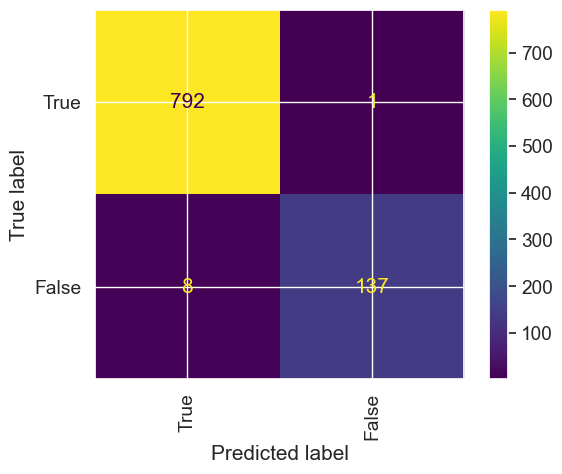

In [69]:
# Plot confusion matrix
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
ConfusionMatrixDisplay.from_estimator(rnd_clf, X_test, y_test, display_labels = labels, xticks_rotation = 'vertical')

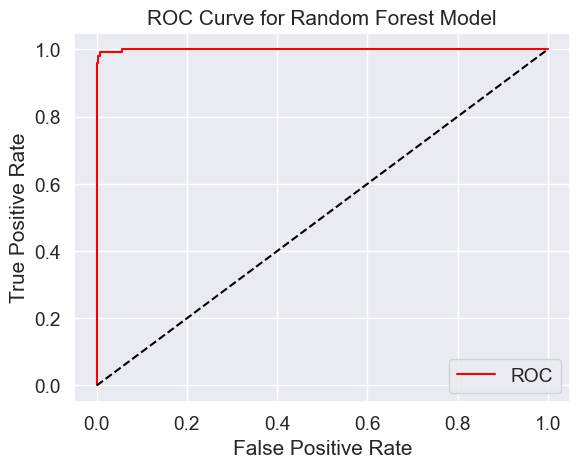

0.9994260120885333

In [70]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='red', label="ROC")
    plt.plot([0,1], [0,1], color='black', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Random Forest Model')
    plt.legend()
    plt.show()
y_pred_prob = rnd_clf.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plot_roc_curve(fpr, tpr)

roc_auc_score(y_test, y_pred_prob)

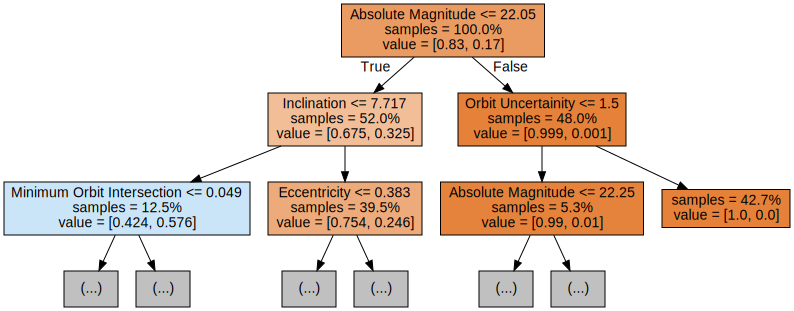

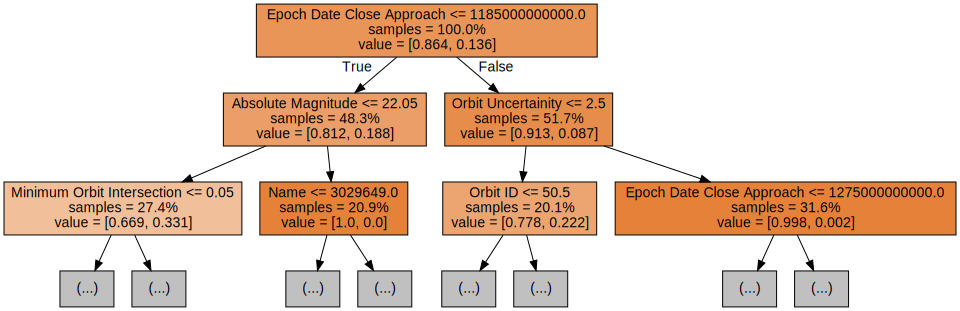

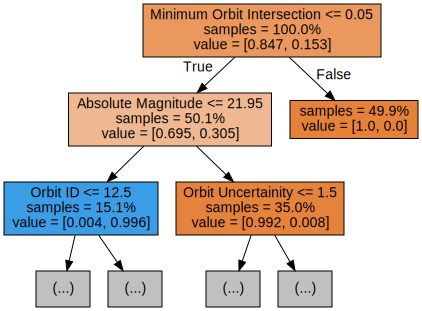

In [71]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rnd_clf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [72]:
print(rnd_clf.feature_importances_)

[0.03717882 0.24570926 0.00380205 0.08106392 0.0791413  0.40344006
 0.0156837  0.02008244 0.0485972  0.00454644 0.04851392 0.00799195
 0.00424896]


range(0, 13)


Text(0, 0.5, 'Feature Names')

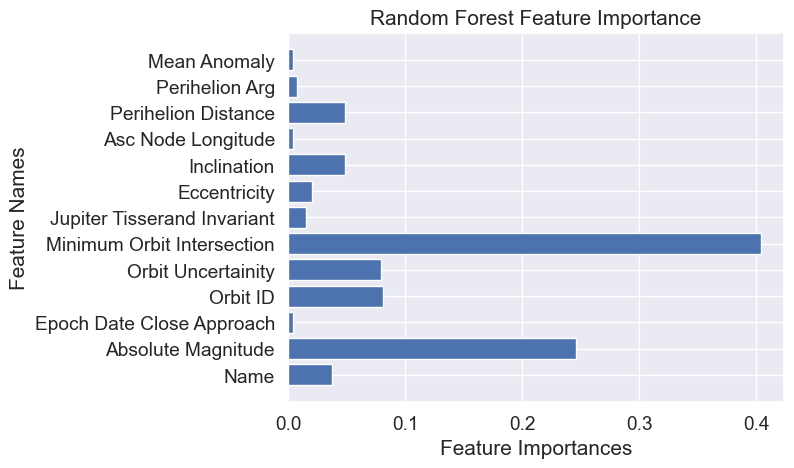

In [73]:
n_features = X_train.shape[1]
print(range(n_features))
plt.barh(range(n_features), rnd_clf.feature_importances_, align='center')
plt.yticks(ticks=np.arange(n_features), labels=X_train.columns)
plt.title('Random Forest Feature Importance')
plt.xlabel('Feature Importances')
plt.ylabel('Feature Names')

### Hyperparameter Tuning

In [74]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
import scipy
from scipy.stats import randint
from random import randint
param_dist = {"n_estimators": [20,50,100,200,250,300,350,400],"max_depth": scipy.stats.randint(1, 1500), "max_depth": [None], 'criterion':["gini"]}
# Use random search to find the best hyperparameters
rnd_clf = RandomForestClassifier()
rand_search = RandomizedSearchCV(rnd_clf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'n_estimators': 100, 'max_depth': None, 'criterion': 'gini'}


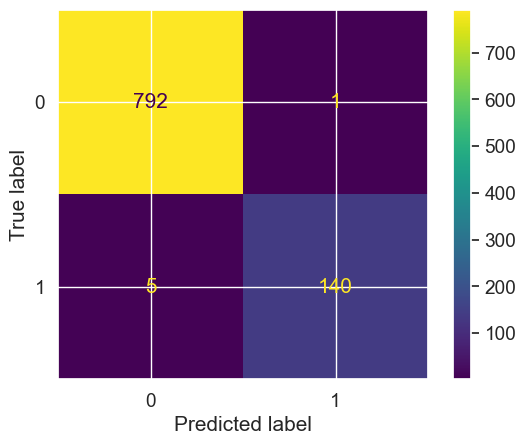

In [75]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score

knn = KNeighborsClassifier(n_neighbors = 1, weights='uniform', algorithm='auto', metric='minkowski')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

# Reference:
# 1. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Accuracy: 0.7526652452025586
Precision: 0.19148936170212766
Recall: 0.18620689655172415


### XGBoosting

In [80]:
from xgboost import XGBClassifier
X = cleaned_features.drop(['Hazardous'], axis=1)
y = cleaned_features.Hazardous
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

#make predictions for test data
y_pred = xgb.predict(X_test)

# Evaluating the model with the accuracy score
accuracy = metrics.accuracy_score(y_test, y_pred)
print(Fore.RED, '\033[1m'+"Accuracy: {:.8f}%".format(accuracy*100))

 Accuracy: 99.14712154%


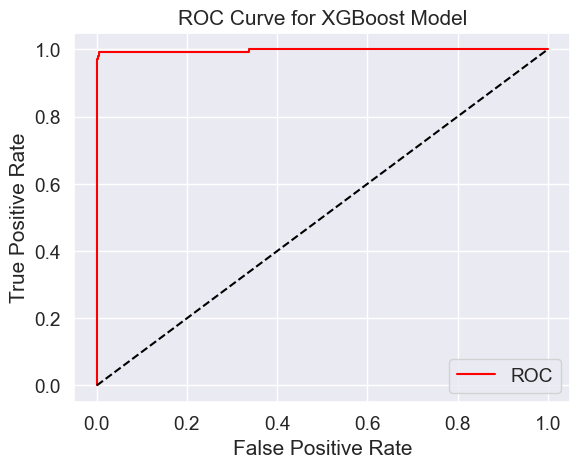

0.9975822933426098

In [81]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='red', label="ROC")
    plt.plot([0,1], [0,1], color='black', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for XGBoost Model')
    plt.legend()
    plt.show()
y_pred_prob = xgb.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plot_roc_curve(fpr, tpr)

roc_auc_score(y_test, y_pred_prob)

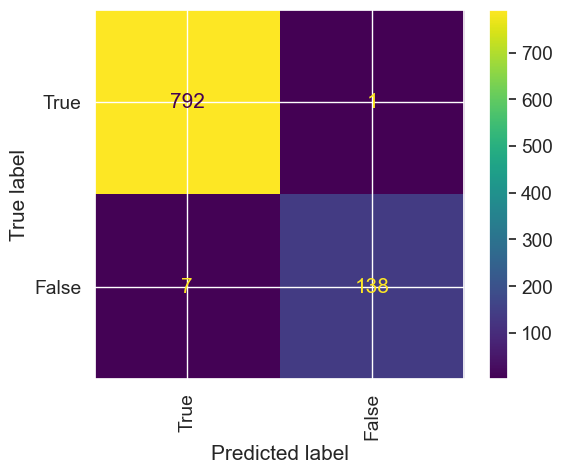

In [82]:
# Plot confusion matrix
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test, display_labels = labels, xticks_rotation = 'vertical')

### Use Calibration Curve(Reliability Curves) to evaluate the performance of the models

In [83]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


invalid value encountered in true_divide


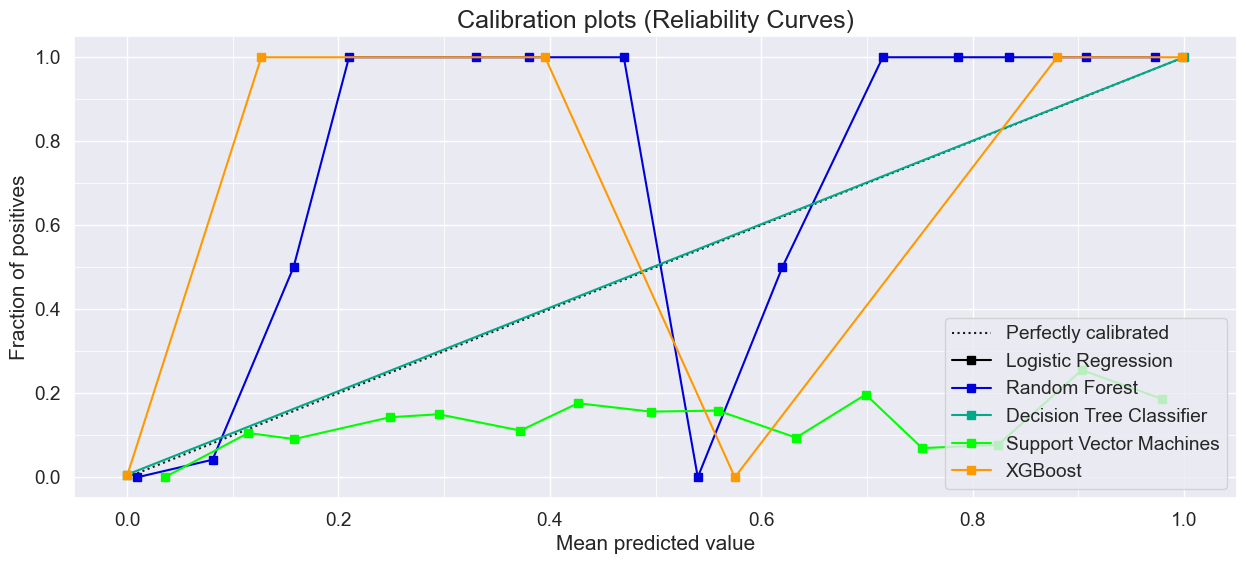

In [90]:
import matplotlib.pyplot as plt
import sklearn
import scikitplot as skplt
from matplotlib.gridspec import GridSpec
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn import metrics
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import AutoMinorLocator


lr_probas = LogisticRegression().fit(X_train, y_train).predict_proba(X_test)
rf_probas = RandomForestClassifier().fit(X_train, y_train).predict_proba(X_test)
dt_probas = DecisionTreeClassifier().fit(X_train, y_train).predict_proba(X_test)
svm_probas = SVC(probability=True).fit(X_train, y_train).predict_proba(X_test)
xgb_probas = XGBClassifier().fit(X_train, y_train).predict_proba(X_test)

probas_list = [lr_probas, rf_probas, dt_probas, svm_probas, xgb_probas]
clf_names =["Logistic Regression", "Random Forest","Decision Tree Classifier", "Support Vector Machines", "XGBoost" ]
clf_list = [(lr_probas, "Logistic Regression"), 
            (rf_probas, "Random Forest"), 
            (dt_probas, "Decision Tree"),
            (svm_probas, "Support Vector Machine"),
            (xgb_probas, "XGBoost"),
           ]

ax =skplt.metrics.plot_calibration_curve(y_test, probas_list, clf_names, n_bins=15, figsize=(15,6));
# Set minor ticks/gridline cadence.
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))

# Turn minor gridlines on and make them thinner.
ax.grid(which='minor', linewidth=0.6)

plt.show()